# Random Effects Meta-Analysis

Random-effects meta-analysis accounts for variability in effect sizes across studies by assuming each study estimates a different effect drawn from a shared distribution, thus modeling both within-study error and between-study heterogeneity.

# Graphical Summary

![Random Effect Meta-Analysis](./graphical_summary/Slide18.png)

# Key Formula

In meta-analysis, the weighted mean effect size for a fixed-effects model is calculated as:

$$\hat{\beta} = \frac{\sum_{i=1}^{k} w_i \hat{\beta}_i}{\sum_{i=1}^{k} w_i}$$

Where:
- $\hat{\beta}$ is the combined effect estimate across all studies
- $\hat{\beta}_i$ is the effect estimate from study $i$
- $w_i$ is the weight assigned to study $i$
- $k$ is the number of studies

# Technical Details

## Multiple Fixed-Effects Models

- Weights for Fixed-Effects
    $$w_i = \frac{1}{v_i}$$
    Where $v_i$ is the within-study variance for study $i$

- Variance of the Combined Estimate
    $$Var(\hat{\beta}) = \frac{1}{\sum_{i=1}^{k} w_i}$$

- Standard Error of the Combined Estimate
    $$SE(\hat{\beta}) = \sqrt{Var(\hat{\beta})} = \sqrt{\frac{1}{\sum_{i=1}^{k} w_i}}$$

## Multiple Random-Effects Models

- Weighted Mean Effect Size
$$\hat{\beta}^* = \frac{\sum_{i=1}^{k} w_i^* \hat{\beta}_i}{\sum_{i=1}^{k} w_i^*}$$

- Weights for Random-Effects
    $$w_i^* = \frac{1}{v_i + \tau^2}$$

    Where $\tau^2$ is the between-study variance

## Meta-Analysis in Genetic Studies

In genetic studies, meta-analysis often combines results from genome-wide association studies (GWAS) across different cohorts with weights either from the sample size or the inverse variance:

- Sample Size Weighting
    $$w_i = \sqrt{N_i}$$

    Where $N_i$ is the sample size of study $i$

- Inverse Variance Weighting
    $$w_i = \frac{1}{SE(\hat{\beta}_i)^2}$$

    Where $SE(\hat{\beta}_i)$ is the standard error of the effect size estimate in study $i$

# Example

This example demonstrates a meta-analysis of genetic variants across two European cohorts. We'll analyze 3 genetic variants (SNPs) that have been genotyped in both cohorts and combine their effects using fixed-effects meta-analysis.

We first generate the summary statistics for 3 variants from two independent European cohorts with different sample sizes (N=8000 and N=5500), and assuming that they are from the same genetic ancestry so they can be meta-analyzed.

Then we perform fixed-effects meta-analysis combining results using:
- Sample size weighting (weight proportional to $\frac{1}{\sqrt{N}}$)
- Inverse variance weighting (weight = $\frac{1}{\text{SE}^2}$)

Lastly we plot the effect size and p-values for each variant and compare the results from separate cohorts and meta-analysis results. We also compare the variance based on the sample size and inverse variance.

In [11]:
rm(list=ls())
set.seed(123)

library(ggplot2)
library(gridExtra)

# =============================================================================
# SETUP: Generate genotype data
# =============================================================================
N1 <- 5000
N2 <- 8000
maf1 <- 0.3
maf2 <- 0.35

variant_pop1 <- rbinom(N1, 2, maf1)
variant_pop2 <- rbinom(N2, 2, maf2)


In [12]:
# Meta-analysis parameters
mu_beta <- 1.0      # Overall mean effect across populations
tau_squared <- 0.2  # Between-study variance (heterogeneity)
sigma <- 3          # Within-study error

# Draw population-specific true effects from random distribution
beta_pop1 <- rnorm(1, mean = mu_beta, sd = sqrt(tau_squared))
beta_pop2 <- rnorm(1, mean = mu_beta, sd = sqrt(tau_squared))

cat("Population-specific true effects:\n")
cat("beta1 =", round(beta_pop1, 3), "\n")
cat("beta2 =", round(beta_pop2, 3), "\n")
cat("Overall mu =", mu_beta, ", tau^2 =", tau_squared, "\n\n")

# Generate phenotypes using population-specific effects
y_pop1 <- beta_pop1 * variant_pop1 + rnorm(N1, 0, sigma)
y_pop2 <- beta_pop2 * variant_pop2 + rnorm(N2, 0, sigma)


Population-specific true effects:
beta1 = 1.261 
beta2 = 0.912 
Overall mu = 1 , tau^2 = 0.2 



In [13]:
# =============================================================================
# COMPUTE SUMMARY STATISTICS FOR EACH POPULATION
# =============================================================================

# Population 1 analysis
lm_pop1 <- lm(y_pop1 ~ variant_pop1)
beta_hat1 <- coef(lm_pop1)["variant_pop1"]
se1 <- summary(lm_pop1)$coefficients["variant_pop1", "Std. Error"]
z1 <- beta_hat1 / se1
p1 <- 2 * pnorm(-abs(z1))

# Population 2 analysis  
lm_pop2 <- lm(y_pop2 ~ variant_pop2)
beta_hat2 <- coef(lm_pop2)["variant_pop2"]
se2 <- summary(lm_pop2)$coefficients["variant_pop2", "Std. Error"]
z2 <- beta_hat2 / se2
p2 <- 2 * pnorm(-abs(z2))

# Display summary statistics
cat("=============================================================================\n")
cat("SUMMARY STATISTICS FOR EACH POPULATION\n")
cat("=============================================================================\n\n")

cat("Population 1 (N =", N1, "):\n")
cat("  Estimated effect (beta_hat1) =", round(beta_hat1, 4), "\n")
cat("  Standard error (SE1)         =", round(se1, 4), "\n")
cat("  Z-score                      =", round(z1, 4), "\n")
cat("  P-value                      =", format(p1, scientific = TRUE, digits = 3), "\n")
cat("  True effect (beta1)          =", round(beta_pop1, 4), "\n\n")

cat("Population 2 (N =", N2, "):\n")
cat("  Estimated effect (beta_hat2) =", round(beta_hat2, 4), "\n")
cat("  Standard error (SE2)         =", round(se2, 4), "\n")
cat("  Z-score                      =", round(z2, 4), "\n")
cat("  P-value                      =", format(p2, scientific = TRUE, digits = 3), "\n")
cat("  True effect (beta2)          =", round(beta_pop2, 4), "\n\n")

# Create summary table
summary_stats <- data.frame(
  Population = c("Population 1", "Population 2"),
  N = c(N1, N2),
  Beta_hat = c(beta_hat1, beta_hat2),
  SE = c(se1, se2),
  Z_score = c(z1, z2),
  P_value = c(p1, p2),
  True_beta = c(beta_pop1, beta_pop2)
)

cat("Summary Table:\n")
summary_stats


SUMMARY STATISTICS FOR EACH POPULATION

Population 1 (N = 5000 ):
  Estimated effect (beta_hat1) = 1.2508 
  Standard error (SE1)         = 0.0659 
  Z-score                      = 18.992 
  P-value                      = 1.99e-80 
  True effect (beta1)          = 1.2614 

Population 2 (N = 8000 ):
  Estimated effect (beta_hat2) = 0.8503 
  Standard error (SE2)         = 0.0503 
  Z-score                      = 16.8898 
  P-value                      = 5.35e-64 
  True effect (beta2)          = 0.9117 

Summary Table:


,Population,N,Beta_hat,SE,Z_score,P_value,True_beta
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
variant_pop1,Population 1,5000,1.2507704,0.06585777,18.99200,1.986322e-80,1.2613730
variant_pop2,Population 2,8000,0.8503044,0.05034431,16.88978,5.349916e-64,0.9116629


Then we estimate the genetic effect under the random effect model using `metagen()`, which performs the random effects meta-analysis using the DerSimonian-Laird method (`method.tau = "DL"`) to estimate the between-study variance $\tau^2$. In the following example we manually compute the random effect result.


In [16]:
# =============================================================================
# RANDOM EFFECTS META-ANALYSIS (Manual DerSimonian-Laird Method)
# =============================================================================

# Step 1: Calculate fixed effects estimate first (needed for Q statistic)
w1_fixed <- 1 / se1^2
w2_fixed <- 1 / se2^2
beta_fixed <- (beta_hat1 * w1_fixed + beta_hat2 * w2_fixed) / (w1_fixed + w2_fixed)
se_fixed <- sqrt(1 / (w1_fixed + w2_fixed))

# Step 2: Calculate Q statistic for heterogeneity
Q <- w1_fixed * (beta_hat1 - beta_fixed)^2 + w2_fixed * (beta_hat2 - beta_fixed)^2
df <- 1  # k-1 studies (we have 2 studies)

# Step 3: Estimate between-study variance τ² using DerSimonian-Laird
C <- w1_fixed + w2_fixed - (w1_fixed^2 + w2_fixed^2)/(w1_fixed + w2_fixed)
tau2_hat <- max(0, (Q - df) / C)

# Step 4: Calculate random effects weights (incorporating τ²)
w1_random <- 1 / (se1^2 + tau2_hat)
w2_random <- 1 / (se2^2 + tau2_hat)

# Step 5: Random effects pooled estimate
beta_random <- (beta_hat1 * w1_random + beta_hat2 * w2_random) / (w1_random + w2_random)
se_random <- sqrt(1 / (w1_random + w2_random))
z_random <- beta_random / se_random
p_random <- 2 * pnorm(-abs(z_random))

# Calculate I² statistic (percentage of variation due to heterogeneity)
I2 <- max(0, 100 * (Q - df) / Q)

cat("=============================================================================\n")
cat("RANDOM EFFECTS META-ANALYSIS RESULTS\n")
cat("=============================================================================\n\n")

cat("Heterogeneity Assessment:\n")
cat("  Q-statistic =", round(Q, 3), "\n")
cat("  Degrees of freedom =", df, "\n")
cat("  P-value for heterogeneity =", round(1 - pchisq(Q, df), 4), "\n")
cat("  I^2 =", round(I2, 1), "% (variation due to heterogeneity)\n")
cat("  tau^2 =", round(tau2_hat, 4), "(estimated between-study variance)\n\n")

cat("Weight Comparison:\n")
cat("  Fixed Effect Weights:  w_1 =", round(w1_fixed, 1), ", w_2 =", round(w2_fixed, 1), "\n")
cat("  Random Effect Weights: w_1 =", round(w1_random, 1), ", w_2 =", round(w2_random, 1), "\n\n")

cat("Meta-Analysis Results:\n")
cat("  Fixed Effects:  beta =", round(beta_fixed, 4), ", SE =", round(se_fixed, 4), "\n")
cat("  Random Effects:  beta =", round(beta_random, 4), ", SE =", round(se_random, 4), "\n")
cat("  Z-score =", round(z_random, 2), ", P-value =", format(p_random, scientific = TRUE), "\n\n")

cat("Comparison with True Values:\n")
cat("  True overall mean (mu) =", mu_beta, "\n")
cat("  True between-study variance (tau^2) =", tau_squared, "\n")
cat("  Estimated tau^2 =", round(tau2_hat, 4), "\n")


RANDOM EFFECTS META-ANALYSIS RESULTS

Heterogeneity Assessment:
  Q-statistic = 23.338 
  Degrees of freedom = 1 
  P-value for heterogeneity = 0 
  I^2 = 95.7 % (variation due to heterogeneity)
  tau^2 = 0.0768 (estimated between-study variance)

Weight Comparison:
  Fixed Effect Weights:  w_1 = 230.6 , w_2 = 394.5 
  Random Effect Weights: w_1 = 12.3 , w_2 = 12.6 

Meta-Analysis Results:
  Fixed Effects:  beta = 0.998 , SE = 0.04 
  Random Effects:  beta = 1.0483 , SE = 0.2002 
  Z-score = 5.24 , P-value = 1.643922e-07 

Comparison with True Values:
  True overall mean (mu) = 1 
  True between-study variance (tau^2) = 0.2 
  Estimated tau^2 = 0.0768 


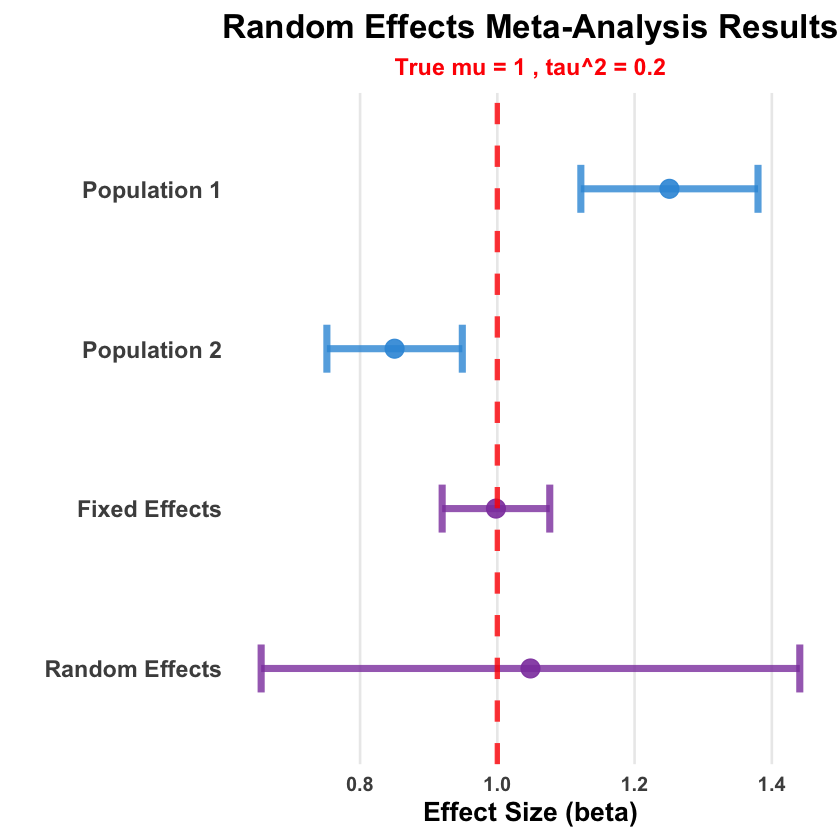

In [24]:
# Load ggplot2
library(ggplot2)

# Create directory if it doesn't exist
dir.create("./cartoons", showWarnings = FALSE)

# Data for plotting
forest_data <- data.frame(
  Study = factor(c("Population 1", "Population 2", "Fixed Effects", "Random Effects"),
                 levels = c("Random Effects", "Fixed Effects", "Population 2", "Population 1")),
  Estimate = c(beta_hat1, beta_hat2, beta_fixed, beta_random),
  Lower = c(beta_hat1 - 1.96*se1, beta_hat2 - 1.96*se2, 
            beta_fixed - 1.96*se_fixed, beta_random - 1.96*se_random),
  Upper = c(beta_hat1 + 1.96*se1, beta_hat2 + 1.96*se2, 
            beta_fixed + 1.96*se_fixed, beta_random + 1.96*se_random),
  Type = factor(c("Individual", "Individual", "Meta-Analysis", "Meta-Analysis"),
                levels = c("Individual", "Meta-Analysis")),
  Method = c("", "", "Fixed", "Random")
)

# Create enhanced forest plot
p <- ggplot(forest_data, aes(x = Estimate, y = Study)) +
  # Add confidence intervals with thick lines
  geom_errorbarh(aes(xmin = Lower, xmax = Upper, color = Type), 
                 height = 0.3, size = 2, alpha = 0.8) +
  # Add point estimates with larger points
  geom_point(aes(color = Type), size = 5, alpha = 0.9) +
  # Add reference line at true mean
  geom_vline(xintercept = mu_beta, linetype = "dashed", color = "red", 
             size = 1.5, alpha = 0.8) +
  # Customize colors
  scale_color_manual(values = c("Individual" = "#3498db", "Meta-Analysis" = "#8e44ad"),
                     name = "Study Type") +
  # Labels and title with larger, bold fonts
  labs(title = "Random Effects Meta-Analysis Results",
       subtitle = paste("True mu =", mu_beta, ", tau^2 =", round(tau_squared, 3)),
       x = "Effect Size (beta)",
       y = "") +
  # Theme customization
  theme_minimal(base_size = 16) +
  theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    plot.subtitle = element_text(size = 14, face = "bold", hjust = 0.5, color = "red"),
    axis.title.x = element_text(size = 16, face = "bold"),
    axis.text.y = element_text(size = 14, face = "bold"),
    axis.text.x = element_text(size = 12, face = "bold"),
    legend.title = element_blank(),
    legend.text = element_blank(),
    legend.position = "none",
    panel.grid.major.y = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    # Add transparent backgrounds
    panel.background = element_rect(fill = "transparent", color = NA),
    plot.background = element_rect(fill = "transparent", color = NA)
  ) 
# Print the plot
print(p)

# Save the plot with specified dimensions
ggsave("./cartoons/meta_analysis_random_effect.png", 
       plot = p, 
       width = 10, 
       height = 6, 
       dpi = 300,
       bg = "transparent")


# Supplementary

## Generate and Perform GWAS for Study 1

In this section, we generate the genotype matrix for Study 1, which consists of **100 individuals and 3 variants (SNPs)**. Each individual's genotype is represented by values 0, 1, or 2. The matrix is then standardized, meaning each column (representing a variant) will have a mean of 0 and variance of 1. After that, we simulate the response variable and perform the GWAS analysis by **running OLS regression for each SNP individually**.

Steps:
- Create a random genotype matrix for 100 individuals and 3 variants.
- Standardize the genotype matrix.
- Generate the response variable for 100 individuals.
- Perform OLS regression for each SNP to calculate the estimated effect sizes and standard errors.

In [ ]:
# ---- Study 1 (100 individuals) ----
N1 <- 100  # Number of individuals in study 1
M <- 3     # Number of SNPs (variants)

# Create a random genotype matrix (0, 1, 2 values for each SNP)
X_raw1 <- matrix(sample(0:2, N1 * M, replace = TRUE), nrow = N1, ncol = M)

# Adding row and column names for Study 1
rownames(X_raw1) <- paste("Individual", 1:N1)
colnames(X_raw1) <- paste("Variant", 1:M)

# Standardize genotype matrix for Study 1
X1 = scale(X_raw1, scale=TRUE)

# Simulate phenotype with the true effect size on the causal SNP (SNP 2)
y1 <- true_effect_size * X1[, true_causal_variant] + rnorm(N1, mean = 0, sd = 1)

# Perform GWAS-style analysis for Study 1: Test each SNP independently using OLS
p_values1 <- numeric(M)  # Store p-values for Study 1
betas1 <- numeric(M)     # Store estimated effect sizes for Study 1
se1 <- numeric(M)        # Store standard errors for Study 1

for (j in 1:M) {
  SNP <- X1[, j]  # Extract genotype for SNP j
  model <- lm(y1 ~ SNP)  # OLS regression: Trait ~ SNP
  summary_model <- summary(model)
  
  # Store p-value, effect size (coefficient), and standard error
  p_values1[j] <- summary_model$coefficients[2, 4]  # p-value for SNP effect
  betas1[j] <- summary_model$coefficients[2, 1]     # Estimated beta coefficient
  se1[j] <- summary_model$coefficients[2, 2]        # Standard error of beta
}

# Create results table for Study 1
gwas_results1 <- data.frame(Variant = colnames(X1), Beta = betas1, SE = se1, P_Value = p_values1)
gwas_results1

## Generate and Perform GWAS for Study 2
In this section, we generate the genotype matrix for Study 2, which consists of **500 individuals and 3 variants (SNPs)**. Similar to Study 1, the genotype matrix is standardized. The response variable is also simulated, and we perform the GWAS analysis by running OLS regression for each SNP independently to obtain the effect sizes and standard errors.

The steps are the same as Study 1.

In [ ]:
# ---- Study 2 (500 individuals) ----
N2 <- 500  # Number of individuals in study 2

# Create a random genotype matrix (0, 1, 2 values for each SNP)
X_raw2 <- matrix(sample(0:2, N2 * M, replace = TRUE), nrow = N2, ncol = M)

# Adding row and column names for Study 2
rownames(X_raw2) <- paste("Individual", 1:N2)
colnames(X_raw2) <- paste("Variant", 1:M)

# Standardize genotype matrix for Study 2
X2 = scale(X_raw2, scale=TRUE)

# Simulate phenotype with the true effect size on the causal SNP (SNP 2)
y2 <- true_effect_size * X2[, true_causal_variant] + rnorm(N2, mean = 0, sd = 1)

# Perform GWAS-style analysis for Study 2: Test each SNP independently using OLS
p_values2 <- numeric(M)  # Store p-values for Study 2
betas2 <- numeric(M)     # Store estimated effect sizes for Study 2
se2 <- numeric(M)        # Store standard errors for Study 2

for (j in 1:M) {
  SNP <- X2[, j]  # Extract genotype for SNP j
  model <- lm(y2 ~ SNP)  # OLS regression: Trait ~ SNP
  summary_model <- summary(model)
  
  # Store p-value, effect size (coefficient), and standard error
  p_values2[j] <- summary_model$coefficients[2, 4]  # p-value for SNP effect
  betas2[j] <- summary_model$coefficients[2, 1]     # Estimated beta coefficient
  se2[j] <- summary_model$coefficients[2, 2]        # Standard error of beta
}

# Create results table for Study 2
gwas_results2 <- data.frame(Variant = colnames(X2), Beta = betas2, SE = se2, P_Value = p_values2)
gwas_results2

## Meta-Analysis

After performing the GWAS in both Study 1 and Study 2, we conduct a **meta-analysis** to combine the results from both studies and obtain a more robust estimate of the true effect size. 

The meta-analysis is performed using **inverse variance weighting**, where the effect size estimates from each study are weighted by the inverse of their squared standard errors. This ensures that studies with more precise estimates (smaller standard errors) contribute more to the combined estimate. The weighted average of the effect sizes from both studies is calculated, providing a summary effect size that incorporates data from both studies. This meta-analysis helps to obtain a more accurate and consistent estimate of the effect of each SNP on the trait across different sample sizes.

In [ ]:
# ---- Meta-Analysis (Inverse Variance Weighting) ----

# Calculate weights (inverse of variance)
w1 <- 1 / (se1^2)  # Weights for Study 1
w2 <- 1 / (se2^2)  # Weights for Study 2

# Calculate combined effect size using inverse variance weighting
combined_betas <- (w1 * betas1 + w2 * betas2) / (w1 + w2)

# Calculate variance of the combined effect size
combined_variance <- 1 / (w1 + w2)
combined_se <- sqrt(combined_variance)

# Calculate p-values for each study's effect size
p_value_study1 <- 2 * (1 - pnorm(abs(betas1 / se1)))  # P-value for Study 1
p_value_study2 <- 2 * (1 - pnorm(abs(betas2 / se2)))  # P-value for Study 2

# Calculate p-value for the combined effect size
p_value_combined <- 2 * (1 - pnorm(abs(combined_betas / combined_se)))

# Combine the results
meta_analysis_results <- data.frame(
  Variant = colnames(X1),
  Beta_Study1 = betas1, SE_Study1 = se1, P_Value_Study1 = p_value_study1,
  Beta_Study2 = betas2, SE_Study2 = se2, P_Value_Study2 = p_value_study2,
  Combined_Beta = combined_betas, Combined_SE = combined_se,
  Combined_P_Value = p_value_combined
)

print("Meta-Analysis Results (Inverse Variance Weighting):")
meta_analysis_results


The fixed effect model assumes that the true effect size of each variant is the same across all studies. For example, in Variant 2, the estimated effect sizes from both studies (0.4060 from Study 1 and 0.4289 from Study 2) are very similar, suggesting that the true effect size may be constant across studies. By using a fixed effect model, we can combine these estimates into a single, more precise effect size (0.4256 for Variant 2), taking into account the study precisions through inverse variance weighting.

Meta-analysis is essential here because it allows us to combine results from multiple studies, adjusting for differences in sample sizes and precision. Study 2 has more individuals and therefore a more precise estimate of the effect size, so it contributes more to the combined estimate. 

The meta-analysis ensures that the combined effect size is not only a weighted average of the studies' estimates but also accounts for the variability between studies, offering a more reliable and accurate estimate of the true effect size.

> slide 146 in Hailiang Huang's slides
>
> slide 244-246 from GW

When we move from one study to multiple studies (e.g., in a meta-analysis), you may want to test whether a particular SNP has the same effect across studies. This is where the idea of sharing a common effect size becomes relevant.

In a meta-analysis of multiple studies, we often assume that the true effect size for each SNP is **the same across all studies** (but possibly with different observed effect sizes due to different sample sizes, populations, etc.). The meta-analysis combines results from multiple studies, and the fixed effect model in this context would assume that the SNP's effect size is consistent across all the studies being analyzed.

**[FIXME]** should we introduce the concept of meta-analysis first before discussing about FEM and REM?

---



In a fixed effect meta-analysis, we assume that the observed effect size $\hat{\beta}_k$ from study $k$ follows a normal distribution:

$$
\hat{\beta}_k \sim N(\beta_j, s_k^2)
$$

Where:
- $\beta_j$ is the **true effect size** for SNP $j$, assumed to be the same across all studies.
- $s_k^2$ is the **variance** of the observed effect size $\hat{\beta}_k$ for study $k$, reflecting the precision of the estimate in study $k$.



## Combined Estimate of Effect Size

   The goal of the meta-analysis is to estimate the true effect size $\beta_j$ from the observed effect sizes $\hat{\beta}_k$ across all studies. We do this by calculating a **weighted average** of the observed effect sizes, where the weights are proportional to the precision of each estimate (i.e., inversely proportional to the variance $s_k^2$):

   $$
   \hat{\beta}_j = \frac{\sum_{k=1}^{K} w_k \hat{\beta}_{k}}{\sum_{k=1}^{K} w_k}
   $$

   Where:
   - $w_k = \frac{1}{s_k^2}$ is the weight for study $k$.




## Maximum Likelihood Estimation (MLE) of the Summary Effect

   The MLE for the summary effect size $\beta_j$ under the fixed effect model is equivalent to the **inverse variance weighting**. This is because we assume that the observed effect sizes $\hat{\beta}_k$ are normally distributed with mean $\beta_j$ and variance $s_k^2$. The likelihood function for the fixed effect model is maximized by weighting the observed effect sizes by the inverse of their variances:

   $$
   \hat{\beta}_j = \frac{\sum_{k=1}^{K} \frac{\hat{\beta}_k}{s_k^2}}{\sum_{k=1}^{K} \frac{1}{s_k^2}}
   $$

   This is the **inverse variance weighting** formula used to combine the effect sizes from different studies in a meta-analysis.



## Heterogeneity Assessment

Heterogeneity assessment is a crucial component of meta-analysis because it evaluates whether the observed effect sizes across different studies are more variable than would be expected by chance alone. This helps us understand if we're truly measuring the same effect across studies or if there are underlying differences. Below are several ways to measure it.

### Cochran's Q Statistic:
$$Q = \sum_{i=1}^{k} w_i(\hat{\beta}_i - \hat{\beta})^2$$

This statistic follows a $\chi^2$ distribution with $k-1$ degrees of freedom under the null hypothesis of homogeneity.

### $I^2$ Statistic (Percentage of Variation Due to Heterogeneity)
$$I^2 = \max\left\{0, \frac{Q-(k-1)}{Q} \times 100\%\right\}$$

- Interpretation:
  - 0-25%: Might not be important
  - 25-50%: Moderate heterogeneity
  - 50-75%: Substantial heterogeneity
  - 75-100%: Considerable heterogeneity
